
# **Image_MS_GWAS_Finemapping_Top_Loci_Overview**

## **Background**

Top variants were identified if they met **either** of the following criteria:

- Belonged to a **95% credible set (CS)** with **minimum correlation (min_corr) ≥ 0.8**, or  
- Had a **posterior inclusion probability (PIP) > 0.05**.

A CS is considered spurious when meeting either of the criteria below, which is relatively sensitive to LD mismatch and tend to choose other models:
- `p_value > 1e-4`  
- `cs_corr > 0.3`

(For detailed model selection criteria, please refer to the [final_decision.ipynb](https://github.com/cumc/xqtl-analysis/blob/main/analysis/Wang_Columbia/EDA/Finemapping_results_summary/Automated_QC_EDA/final_desicion.ipynb).)

---

## **Summary**

### **Variant-Level Overview**

| Trait           | Top Variants | In 95% CS | Total Variants |
|------------------|---------------|------------|-----------------|
| MS_EUR           | 4,400         | 1,015      | 8,954,288       |
| image_AD1        | 4,334         | 183        | 6,475,770       |
| image_Aging5     | 3,938         | 842        | 8,466,949       |
| image_Aging4     | 3,103         | 255        | 8,466,949       |
| image_Aging1     | 2,888         | 303        | 8,466,949       |
| image_Aging2     | 2,702         | 137        | 8,466,949       |
| image_AD2        | 2,263         | 190        | 6,475,770       |
| image_Aging3     | 2,166         | 221        | 8,466,949       |


---

### **Credible Set (CS)-Level Overview**

| Trait           | CS Count | Single-Variant CS | Proportion (%) |
|------------------|-----------|--------------------|-----------------|
| MS_EUR           | 56        | 6                  | 10.7%           |
| image_AD1        | 9         | 0                  | 0.0%            |
| image_AD2        | 12        | 4                  | 33.3%           |
| image_Aging1     | 13        | 1                  | 7.7%            |
| image_Aging2     | 11        | 1                  | 9.1%            |
| image_Aging3     | 9         | 1                  | 11.1%           |
| image_Aging4     | 12        | 0                  | 0.0%            |
| image_Aging5     | 17        | 2                  | 11.8%           |


---

### **Study-Block Level Overview**

| Trait           | Blocks with CS |
|------------------|-----------------|
| MS_EUR           | 49              |
| image_AD1        | 9               |
| image_AD2        | 12              |
| image_Aging1     | 12              |
| image_Aging2     | 11              |
| image_Aging3     | 9               |
| image_Aging4     | 12              |
| image_Aging5     | 17              |


#### **Study Blocks by CS Count**

- **MS_EUR**:  
  - 49 study_blocks contain CS  
  - 42 blocks have **1 CS**, 7 blocks have **2 CS**

- **Image Traits Combined**:  
  - 82 study_blocks contain CS  
  - 81 blocks have **1 CS**, only **1 block** in `image_Aging1` has **2 CS**

#### **Study Blocks by Fine-Mapping Model**

- **Image Traits**:  
  - All used **single_effect_NO_QC**, except for chr14_53697988_56126490,image_Aging1, which used **susie_rss_RSS_QC_RAISS_imputed**

- **MS_EUR**:  
  - Out of 49 study_blocks with CS:
    - 6 used **susie_rss_RSS_QC_RAISS_imputed**
    - 2 used **bayesian_conditional_regression_RSS_QC_RAISS_imputed**
    - 41 used **single_effect_NO_QC**


## Visualization between manhattan plot and psuedo_manhattan plot from finemapping
1. The pseudo-Manhattan plot includes only variants within the 95% credible set, with the x-axis representing chromosome and variant position, and the y-axis indicating the posterior inclusion probability (PIP). A reference line was drawn at PIP = 0.1.
2. In parallel, a genome-wide Manhattan plot based on raw GWAS summary statistics includes a Bonferroni-corrected significance threshold.
3. The two plots reveal consistent signals at the block level across all traits, providing support for the quality of the fine-mapping results.

## PIP plot for the study_block with 2 CS
I drew the PIP plot for the only study_block with 2 CS, the two CS are physically located but correlation between CS is not large(-0.037).

## Shared study_blocks across traits
Since most study blocks use the SER model for fine-mapping, I can identify overlapping variants to detect shared significant SNPs and shared study_blocks, although this might be conservative...
![Upset Plot at study_block level](./all_variants_upset_plot.pdf)
1. AI brain subpatterns(Aging1-5) are relatively independent from each other in Aging. So as in AD.
* AD1 and AD2 shared 10 variants in 1 study_block.
* Aging1 and Aging2 shared 47 variants in 1 study_block.
* Aging3 and Aging4 shared 3 variants in 1 study_block.
* Aging3 and Aging5 shared 1 variants in 1 study_block.
2. A naive thought for further analysis is to pay attention to the the commoness and difference between Aging2 and AD2...


## Top loci that can be explained by GVC gene list

* a. Analysis steps:

  * To assess the overlap between colocboost-identified variants and the GVC gene list, I defined a **cis-window** for each gene as:[gene_start - 500kb, gene_end + 500kb]

  > This definition is **strand-agnostic** and does not rely on transcription start site (TSS) or transcription end site (TES), which are strand-dependent.

  * For each GVC gene, I checked whether any variants identified by colocboost fall within its cis-window. If a match was found, I added a region column in the format: `chrN:gene_start-500,000_gene_end+500,000`

  * Below is the annotated table showing GVC genes and whether colocboost variants fall within their cis-windows:

    ```   
    #chr     start       end         gene_id strand  gene_name is_in_cis_window                cis_window  contained_variants
            <char>     <int>     <int>          <char> <char>     <char>             <lgcl>                    <char>              <char>
        1:   chr1 207496146 207641764 ENSG00000203710      +        CR1             FALSE                      <NA>                <NA>
        2:   chr1 226870183 226927725 ENSG00000143801      +      PSEN2             FALSE                      <NA>                <NA>
        3:   chr1 226870183 226987544 ENSG00000288674      + AL391628.1             FALSE                      <NA>                <NA>
        4:   chr2 127048026 127107287 ENSG00000136717      -       BIN1             FALSE                      <NA>                <NA>
    ```

* b. Overlap Results

  Out of the **21 GVC genes** (note: two genes share the same Ensembl ID):
  * **one gene SPI1** was be explained by AD2 finemapping results.

## Top loci that can be explained by Table1 gene list

* a. Analysis steps:

  * To assess the overlap between colocboost-identified variants and the GVC gene list, I defined a **cis-window** for each gene as:[gene_start - 500kb, gene_end + 500kb]

  > This definition is **strand-agnostic** and does not rely on transcription start site (TSS) or transcription end site (TES), which are strand-dependent.

  * For each GVC gene, I checked whether any variants identified by colocboost fall within its cis-window. If a match was found, I added a region column in the format: `chrN:gene_start-500,000_gene_end+500,000`

  * Below is the annotated table showing GVC genes and whether colocboost variants fall within their cis-windows:

    ```   
    #chr     start       end         gene_id strand  gene_name is_in_cis_window                cis_window  contained_variants
            <char>     <int>     <int>          <char> <char>     <char>             <lgcl>                    <char>              <char>
        1:   chr1 207496146 207641764 ENSG00000203710      +        CR1             FALSE                      <NA>                <NA>
        2:   chr1 226870183 226927725 ENSG00000143801      +      PSEN2             FALSE                      <NA>                <NA>
        3:   chr1 226870183 226987544 ENSG00000288674      + AL391628.1             FALSE                      <NA>                <NA>
        4:   chr2 127048026 127107287 ENSG00000136717      -       BIN1             FALSE                      <NA>                <NA>
    ```

* b. Overlap Results

  Out of the **76 GVC genes** (note: two genes share the same Ensembl ID):
  * **6 gene WDR12(Aging5), TNIP1(Aging2), UMAD1(Aging2), ICA1(Aging2), SPI1(AD2), FOXF1(Aging5)** was be explained by finemapping results.
  



In [11]:
library(data.table)
library(tidyverse)
library(turner)

In [12]:
# Read in the top_loci table
top_loci <- fread("/home/rl3328/image_QTL/finemapping/image_finemapping_export_cs_corr_0.3_latest/export/AI_IMAGE.hg38_all_blocks_with_MS.toploci.bed.gz")


## Summary

### Variant_level

In [4]:
# Top variants count by event_ID
top_loci |> group_by(event_ID) |> summarise(n = n()) |> arrange(desc(n))

event_ID,n
<chr>,<int>
image_AD1,4032
MS_EUR,3458
image_Aging5,3128
image_Aging1,2379
image_Aging4,2247
image_Aging2,2137
image_Aging3,1895
image_AD2,1791


In [13]:
# Get the top variants with 95% CS with min_corr = 0.8
top_loci_0.95 <- top_loci |> filter(cs_coverage_0.95 > 0)

In [6]:
# number of top variants in 95% CS with min_corr = 0.8 by event_ID
top_loci_0.95 |> group_by(event_ID) |> summarise(n = n()) |> arrange(desc(n))

event_ID,n
<chr>,<int>
MS_EUR,1015
image_Aging5,842
image_Aging1,303
image_Aging4,255
image_Aging3,221
image_AD2,190
image_AD1,183
image_Aging2,137


### Study_Block Level

In [6]:
# Create a column as a CS indicator
top_loci_0.95 = top_loci_0.95 |> mutate(cs = paste0(event_ID,"_", region_id,":"	,cs_coverage_0.95))

In [7]:
top_loci_0.95 |> group_by(chr) |> summarize(n_distinct(cs))

chr,n_distinct(cs)
<int>,<int>
1,18
2,5
3,8
4,6
5,5
6,10
7,11
8,6
9,6


In [8]:
tail(top_loci_0.95)
dim(top_loci_0.95)

chr,pos,a1,a2,variant_ID,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,cs_coverage_0.95_purity0.5,cs_coverage_0.7_purity0.5,cs_coverage_0.5_purity0.5,PIP,region_id,finemap_model,cs
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<dbl>,<chr>,<chr>,<chr>
9,89597695,A,T,9:89597695:T:A,chr9_87677148_89739207,image_Aging2,1,1,0,NA,NA,NA,0.21014927,chr9_87677148_89739207,single_effect_NO_QC,image_Aging2_chr9_87677148_89739207:1
9,89597759,C,T,9:89597759:T:C,chr9_87677148_89739207,image_AD2,1,1,1,NA,NA,NA,0.39929120,chr9_87677148_89739207,single_effect_NO_QC,image_AD2_chr9_87677148_89739207:1
9,89597759,C,T,9:89597759:T:C,chr9_87677148_89739207,image_Aging2,1,1,1,NA,NA,NA,0.22756996,chr9_87677148_89739207,single_effect_NO_QC,image_Aging2_chr9_87677148_89739207:1
9,89599052,A,G,9:89599052:G:A,chr9_87677148_89739207,image_AD2,1,0,0,NA,NA,NA,0.07995615,chr9_87677148_89739207,single_effect_NO_QC,image_AD2_chr9_87677148_89739207:1
9,89599052,A,G,9:89599052:G:A,chr9_87677148_89739207,image_Aging2,1,1,1,NA,NA,NA,0.27397975,chr9_87677148_89739207,single_effect_NO_QC,image_Aging2_chr9_87677148_89739207:1
9,89599810,G,A,9:89599810:A:G,chr9_87677148_89739207,image_Aging2,1,0,0,NA,NA,NA,0.03354827,chr9_87677148_89739207,single_effect_NO_QC,image_Aging2_chr9_87677148_89739207:1


[1] 3146   17

In [9]:
# Study_blocks with CS for each event_ID(trait)
top_loci_0.95 |> count(event_ID, region_id) |> count(event_ID)

event_ID,n
<chr>,<int>
MS_EUR,49
image_AD1,9
image_AD2,12
image_Aging1,12
image_Aging2,11
image_Aging3,9
image_Aging4,12
image_Aging5,17


In [10]:
# Separate
image = top_loci_0.95 |> filter(event_ID != "MS_EUR")
ms = top_loci_0.95 |> filter(event_ID == "MS_EUR")

In [11]:
# image
# finemapping model at study_block level
image |> count(event_ID, region_id, finemap_model) |> count(finemap_model)

# CS Counts at study_block level
image |> count(cs_coverage_0.95, event_ID, region_id) |> group_by(cs_coverage_0.95) |> summarise(n = n()) |> arrange(desc(n))
image |> count(cs_coverage_0.95, event_ID, region_id) |> group_by(event_ID, region_id) |> summarise(cs_count = n()) |> count(cs_count)


finemap_model,n
<chr>,<int>
single_effect_NO_QC,81
susie_rss_RSS_QC_RAISS_imputed,1


cs_coverage_0.95,n
<int>,<int>
1,82
2,1


`summarise()` has grouped output by 'event_ID'. You can override using the
`.groups` argument.


event_ID,cs_count,n
<chr>,<int>,<int>
image_AD1,1,9
image_AD2,1,12
image_Aging1,1,11
image_Aging1,2,1
image_Aging2,1,11
image_Aging3,1,9
image_Aging4,1,12
image_Aging5,1,17


In [12]:
image |>
  group_by(event_ID, region_id) |>
  summarise(distinct_cs_coverage = n_distinct(cs_coverage_0.95)) |>
  filter(distinct_cs_coverage > 1)

`summarise()` has grouped output by 'event_ID'. You can override using the
`.groups` argument.


event_ID,region_id,distinct_cs_coverage
<chr>,<chr>,<int>
image_Aging1,chr14_53697988_56126490,2


In [13]:
image |> filter(region_id =="chr14_53697988_56126490" & event_ID == "image_Aging1") 

chr,pos,a1,a2,variant_ID,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,cs_coverage_0.95_purity0.5,cs_coverage_0.7_purity0.5,cs_coverage_0.5_purity0.5,PIP,region_id,finemap_model,cs
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<dbl>,<chr>,<chr>,<chr>
14,55659306,TG,T,14:55659306:T:TG,chr14_53697988_56126490,image_Aging1,2,2,2,NA,NA,NA,0.99933231,chr14_53697988_56126490,susie_rss_RSS_QC_RAISS_imputed,image_Aging1_chr14_53697988_56126490:2
14,55710790,T,C,14:55710790:C:T,chr14_53697988_56126490,image_Aging1,1,0,0,NA,NA,NA,0.03989820,chr14_53697988_56126490,susie_rss_RSS_QC_RAISS_imputed,image_Aging1_chr14_53697988_56126490:1
14,55714977,A,G,14:55714977:G:A,chr14_53697988_56126490,image_Aging1,1,1,1,NA,NA,NA,0.18899483,chr14_53697988_56126490,susie_rss_RSS_QC_RAISS_imputed,image_Aging1_chr14_53697988_56126490:1
14,55720235,G,A,14:55720235:A:G,chr14_53697988_56126490,image_Aging1,1,1,0,NA,NA,NA,0.07048023,chr14_53697988_56126490,susie_rss_RSS_QC_RAISS_imputed,image_Aging1_chr14_53697988_56126490:1
14,55726554,A,G,14:55726554:G:A,chr14_53697988_56126490,image_Aging1,1,0,0,NA,NA,NA,0.02099950,chr14_53697988_56126490,susie_rss_RSS_QC_RAISS_imputed,image_Aging1_chr14_53697988_56126490:1
14,55726982,T,C,14:55726982:C:T,chr14_53697988_56126490,image_Aging1,1,1,1,NA,NA,NA,0.13187765,chr14_53697988_56126490,susie_rss_RSS_QC_RAISS_imputed,image_Aging1_chr14_53697988_56126490:1
14,55729044,C,T,14:55729044:T:C,chr14_53697988_56126490,image_Aging1,1,1,0,NA,NA,NA,0.07346219,chr14_53697988_56126490,susie_rss_RSS_QC_RAISS_imputed,image_Aging1_chr14_53697988_56126490:1
14,55730321,C,T,14:55730321:T:C,chr14_53697988_56126490,image_Aging1,1,1,1,NA,NA,NA,0.08025924,chr14_53697988_56126490,susie_rss_RSS_QC_RAISS_imputed,image_Aging1_chr14_53697988_56126490:1
14,55730350,A,G,14:55730350:G:A,chr14_53697988_56126490,image_Aging1,1,1,1,NA,NA,NA,0.08016807,chr14_53697988_56126490,susie_rss_RSS_QC_RAISS_imputed,image_Aging1_chr14_53697988_56126490:1


In [14]:
# ms
# finemapping model at study_block level
ms |> count(event_ID, region_id, finemap_model) |> count(finemap_model)


# CS Counts at study_block level
ms |> count(cs_coverage_0.95, event_ID, region_id) |> group_by(event_ID, region_id) |> summarise(cs_count = n()) |> count(cs_count)

finemap_model,n
<chr>,<int>
bayesian_conditional_regression_RSS_QC_RAISS_imputed,2
single_effect_NO_QC,41
susie_rss_RSS_QC_RAISS_imputed,6


`summarise()` has grouped output by 'event_ID'. You can override using the
`.groups` argument.


event_ID,cs_count,n
<chr>,<int>,<int>
MS_EUR,1,42
MS_EUR,2,7


In [15]:
unique(ms$cs_coverage_0.95)

[1] 1 2 3

In [16]:
ms |> filter(cs_coverage_0.95 == 3)
ms |> filter(region_id == "chr7_49173149_50833794" & event_ID == "MS_EUR")

chr,pos,a1,a2,variant_ID,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,cs_coverage_0.95_purity0.5,cs_coverage_0.7_purity0.5,cs_coverage_0.5_purity0.5,PIP,region_id,finemap_model,cs
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<dbl>,<chr>,<chr>,<chr>
7,50291172,G,A,7:50291172:A:G,chr7_49173149_50833794,MS_EUR,3,3,3,NA,NA,NA,0.9754648,chr7_49173149_50833794,susie_rss_RSS_QC_RAISS_imputed,MS_EUR_chr7_49173149_50833794:3


chr,pos,a1,a2,variant_ID,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,cs_coverage_0.95_purity0.5,cs_coverage_0.7_purity0.5,cs_coverage_0.5_purity0.5,PIP,region_id,finemap_model,cs
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<dbl>,<chr>,<chr>,<chr>
7,50278864,C,T,7:50278864:T:C,chr7_49173149_50833794,MS_EUR,1,1,0,NA,NA,NA,0.3250762,chr7_49173149_50833794,susie_rss_RSS_QC_RAISS_imputed,MS_EUR_chr7_49173149_50833794:1
7,50288743,G,A,7:50288743:A:G,chr7_49173149_50833794,MS_EUR,1,1,1,NA,NA,NA,0.6746041,chr7_49173149_50833794,susie_rss_RSS_QC_RAISS_imputed,MS_EUR_chr7_49173149_50833794:1
7,50291172,G,A,7:50291172:A:G,chr7_49173149_50833794,MS_EUR,3,3,3,NA,NA,NA,0.9754648,chr7_49173149_50833794,susie_rss_RSS_QC_RAISS_imputed,MS_EUR_chr7_49173149_50833794:3


### CS level

In [17]:
# CS counts for each event_ID(trait)
top_loci_0.95 |> count(event_ID, cs) |> count(event_ID)

event_ID,n
<chr>,<int>
MS_EUR,56
image_AD1,9
image_AD2,12
image_Aging1,13
image_Aging2,11
image_Aging3,9
image_Aging4,12
image_Aging5,17


In [18]:
top_loci_0.95 |> group_by(cs) |> summarise(n = n()) |> filter(n == 1)

cs,n
<chr>,<int>
MS_EUR_chr10_5563265_7006830:1,1
MS_EUR_chr12_4882038_6411328:1,1
MS_EUR_chr19_9354363_11569122:1,1
MS_EUR_chr19_9354363_11569122:2,1
MS_EUR_chr3_159760299_161902641:1,1
MS_EUR_chr7_49173149_50833794:3,1
image_AD2_chr12_30570684_32921536:1,1
image_AD2_chr12_3219245_4882038:1,1
image_AD2_chr12_61991992_65677087:1,1


## Visualization between manhattan plot and psuedo_manhattan plot from finemapping

In [4]:
Aging1 = top_loci_0.95 |> filter(event_ID == "image_Aging1")

In [32]:
library(CMplot)
cmplot_data_Aging1 <- data.frame(
  SNP = Aging1$variant_ID,
  Chromosome = Aging1$chr,
  Position = Aging1$pos,
  P_value = Aging1$PIP
)

In [72]:
CMplot(cmplot_data_Aging1,
       plot.type = "m",           # "m" for Manhattan plot
       band = 1,                  # Show gray background bands
       col = c("steelblue", "darkred"), # Alternating colors for chromosomes
       threshold = 0.1, # Significance threshold (Bonferroni)
       threshold.col = "red",     # Color for threshold line
       LOG10 = FALSE,
       ylab = expression(italic(PIP)),  # Y-axis label
       file = "jpg",                 # File format
       file.name = "Aging1_pseudo_Manhtn",  # Custom file name
       file.output = TRUE,           # Set to TRUE to output file
       verbose = TRUE)            # Print progress information

 Rectangular Manhattan plotting P_value.
 Plots are stored in: /mnt/vast/hpc/homes/rl3328/image_QTL/image_finemapping_export_cs_corr_0.3_latest/export 


In [5]:
Aging1 |> count(region_id)

region_id,n
<chr>,<int>
chr10_23053090_24429720,19
chr14_53697988_56126490,14
chr14_90480460_92293029,8
chr16_24006835_25479836,29
chr1_2888443_4320284,8
chr20_25046442_32060775,54
chr4_55420021_58069173,5
chr4_81722770_83364947,66
chr5_11875_982414,13


In [5]:
Aging2 = top_loci_0.95 |> filter(event_ID == "image_Aging2")

In [68]:
library(CMplot)
cmplot_data_Aging2 <- data.frame(
  SNP = Aging2$variant_ID,
  Chromosome = Aging2$chr,
  Position = Aging2$pos,
  P_value = Aging2$PIP
)

In [69]:
CMplot(cmplot_data_Aging2,
       plot.type = "m",           # "m" for Manhattan plot
       band = 1,                  # Show gray background bands
       col = c("steelblue", "darkred"), # Alternating colors for chromosomes
       threshold = 0.1, # Significance threshold (Bonferroni)
       threshold.col = "red",     # Color for threshold line
       LOG10 = FALSE,
       ylab = expression(italic(PIP)),  # Y-axis label
       file = "jpg",                 # File format
       file.name = "Aging2_pseudo_Manhtn",  # Custom file name
       file.output = TRUE,           # Set to TRUE to output file
       verbose = TRUE)            # Print progress information

 Rectangular Manhattan plotting P_value.
 Plots are stored in: /mnt/vast/hpc/homes/rl3328/image_QTL/image_finemapping_export_cs_corr_0.3_latest/export 


In [43]:
Aging2 |> count(region_id)

region_id,n
<chr>,<int>
chr10_123788803_125506866,28
chr12_115165608_117668628,5
chr12_3219245_4882038,2
chr12_61991992_65677087,2
chr16_76023784_77705911,17
chr5_149895776_152257891,1
chr5_81766514_84011262,9
chr6_122787546_128506682,48
chr7_6928965_7769511,10


In [6]:
Aging3 = top_loci_0.95 |> filter(event_ID == "image_Aging3")

In [65]:
library(CMplot)
cmplot_data_Aging3 <- data.frame(
  SNP = Aging3$variant_ID,
  Chromosome = Aging3$chr,
  Position = Aging3$pos,
  P_value = Aging3$PIP
)

In [66]:
CMplot(cmplot_data_Aging3,
       plot.type = "m",           # "m" for Manhattan plot
       band = 1,                  # Show gray background bands
       col = c("steelblue", "darkred"), # Alternating colors for chromosomes
       threshold = 0.1, # Significance threshold (Bonferroni)
       threshold.col = "red",     # Color for threshold line
       LOG10 = FALSE,
       ylab = expression(italic(PIP)),  # Y-axis label
       file = "jpg",                 # File format
       file.name = "Aging3_pseudo_Manhtn",  # Custom file name
       file.output = TRUE,           # Set to TRUE to output file
       verbose = TRUE)            # Print progress information

 Rectangular Manhattan plotting P_value.
 Plots are stored in: /mnt/vast/hpc/homes/rl3328/image_QTL/image_finemapping_export_cs_corr_0.3_latest/export 


In [45]:
Aging3 |> count(region_id)

region_id,n
<chr>,<int>
chr12_61991992_65677087,38
chr13_108056156_109536072,101
chr14_58669547_61213190,12
chr19_12408772_15537337,3
chr1_214114077_215979204,3
chr20_40697409_42726168,1
chr2_3926189_5567778,7
chr7_118713025_122731183,13
chr9_84834158_86412165,43


In [7]:
Aging4 = top_loci_0.95 |> filter(event_ID == "image_Aging4")

In [61]:
library(CMplot)
cmplot_data_Aging4 <- data.frame(
  SNP = Aging4$variant_ID,
  Chromosome = Aging4$chr,
  Position = Aging4$pos,
  P_value = Aging4$PIP
)

In [63]:
CMplot(cmplot_data_Aging4,
       plot.type = "m",           # "m" for Manhattan plot
       band = 1,                  # Show gray background bands
       col = c("steelblue", "darkred"), # Alternating colors for chromosomes
       threshold = 0.1, # Significance threshold (Bonferroni)
       threshold.col = "red",     # Color for threshold line
       LOG10 = FALSE,
       ylab = expression(italic(PIP)),  # Y-axis label
       file = "jpg",                 # File format
       file.name = "Aging4_pseudo_Manhtn",  # Custom file name
       file.output = TRUE,           # Set to TRUE to output file
       verbose = TRUE)            # Print progress information

 Rectangular Manhattan plotting P_value.
 Plots are stored in: /mnt/vast/hpc/homes/rl3328/image_QTL/image_finemapping_export_cs_corr_0.3_latest/export 


In [47]:
Aging4 |> count(region_id)

region_id,n
<chr>,<int>
chr10_109887976_113830418,2
chr11_30037956_32009579,65
chr15_38036498_39914612,6
chr16_51830934_54306975,35
chr1_214114077_215979204,3
chr1_233234629_234364329,9
chr1_63330290_66474395,16
chr3_45108216_47545024,4
chr6_43914875_45129743,12


In [8]:
Aging5 = top_loci_0.95 |> filter(event_ID == "image_Aging5")

In [58]:
library(CMplot)
cmplot_data_Aging5 <- data.frame(
  SNP = Aging5$variant_ID,
  Chromosome = Aging5$chr,
  Position = Aging5$pos,
  P_value = Aging5$PIP
)

In [59]:
CMplot(cmplot_data_Aging5,
       plot.type = "m",           # "m" for Manhattan plot
       band = 1,                  # Show gray background bands
       col = c("steelblue", "darkred"), # Alternating colors for chromosomes
       threshold = 0.1, # Significance threshold (Bonferroni)
       threshold.col = "red",     # Color for threshold line
       LOG10 = FALSE,
       ylab = expression(italic(PIP)),  # Y-axis label
       file = "jpg",                 # File format
       file.name = "Aging5_pseudo_Manhtn",  # Custom file name
       file.output = TRUE,           # Set to TRUE to output file
       verbose = TRUE)            # Print progress information

 Rectangular Manhattan plotting P_value.
 Plots are stored in: /mnt/vast/hpc/homes/rl3328/image_QTL/image_finemapping_export_cs_corr_0.3_latest/export 


In [49]:
Aging5 |> count(region_id)

region_id,n
<chr>,<int>
chr11_110348807_112120989,17
chr12_105830574_109677898,1
chr12_132283870_133264718,3
chr15_38036498_39914612,5
chr16_86782214_88382277,33
chr17_76862119_79415165,58
chr1_44020567_47757518,1
chr20_40697409_42726168,53
chr2_201677542_203951659,212


In [9]:
AD1 = top_loci_0.95 |> filter(event_ID == "image_AD1")

In [27]:
library(CMplot)
cmplot_data_AD1 <- data.frame(
  SNP = AD1$variant_ID,
  Chromosome = AD1$chr,
  Position = AD1$pos,
  P_value = AD1$PIP
)

In [53]:
CMplot(cmplot_data_AD1,
       plot.type = "m",           # "m" for Manhattan plot
       band = 1,                  # Show gray background bands
       col = c("steelblue", "darkred"), # Alternating colors for chromosomes
       threshold = 0.1, # Significance threshold (Bonferroni)
       threshold.col = "red",     # Color for threshold line
       LOG10 = FALSE,
       ylab = expression(italic(PIP)),  # Y-axis label
       file = "jpg",                 # File format
       file.name = "AD1_pseudo_Manhtn",  # Custom file name
       file.output = TRUE,           # Set to TRUE to output file
       verbose = TRUE)            # Print progress information

 Rectangular Manhattan plotting P_value.
 Plots are stored in: /mnt/vast/hpc/homes/rl3328/image_QTL/image_finemapping_export_cs_corr_0.3_latest/export 


In [7]:
AD1 |> count(region_id)

region_id,n
<chr>,<int>
chr10_130017190_130891275,4
chr11_30037956_32009579,7
chr14_56126490_58669547,51
chr14_58669547_61213190,10
chr17_69532703_70743921,44
chr19_12408772_15537337,4
chr1_50179506_54277735,40
chr8_41148214_42617647,13
chr9_116251953_117124386,10


In [10]:
AD2 = top_loci_0.95 |> filter(event_ID == "image_AD2")

In [20]:
library(CMplot)
cmplot_data_AD2 <- data.frame(
  SNP = AD2$variant_ID,
  Chromosome = AD2$chr,
  Position = AD2$pos,
  P_value = AD2$PIP
)

In [25]:
# Ensure chromosomes are numeric (they're already <dbl> but to be safe)
cmplot_data_AD2$Chromosome <- as.numeric(cmplot_data_AD2$Chromosome)

# Sort your data by chromosome, then by position numerically
cmplot_data_AD2 <- cmplot_data_AD2[order(cmplot_data_AD2$Chromosome, cmplot_data_AD2$Position),]

# Now the positions should be in correct numerical order within chromosome 12
head(cmplot_data_AD2)

,SNP,Chromosome,Position,P_value
,<chr>,<dbl>,<int>,<dbl>
163,4:21891694:G:A,4,21891694,0.96126646
164,6:126327314:G:A,6,126327314,0.03732241
165,6:126345502:C:T,6,126345502,0.12325009
166,6:126679736:A:G,6,126679736,0.04707533
167,6:126757036:T:C,6,126757036,0.04869906
168,6:126855185:C:T,6,126855185,0.13530019


In [23]:
CMplot(cmplot_data_AD2,
       plot.type = "m",           # "m" for Manhattan plot
       band = 1,                  # Show gray background bands
       col = c("steelblue", "darkred"), # Alternating colors for chromosomes
       threshold = 0.1, # Significance threshold (Bonferroni)
       threshold.col = "red",     # Color for threshold line
       LOG10 = FALSE,
       ylab = expression(italic(PIP)),  # Y-axis label
       file = "jpg",                 # File format
       file.name = "AD2_pseudo_Manhtn",  # Custom file name
       file.output = TRUE,           # Set to TRUE to output file
       verbose = TRUE)            # Print progress information

 Rectangular Manhattan plotting P_value.
 Plots are stored in: /mnt/vast/hpc/homes/rl3328/image_QTL/image_finemapping_export_cs_corr_0.3_latest/export 


In [9]:
AD2 |> count(region_id)

region_id,n
<chr>,<int>
chr11_46916060_49936088,10
chr12_115165608_117668628,4
chr12_30570684_32921536,1
chr12_3219245_4882038,1
chr12_61991992_65677087,1
chr13_35472583_36923754,128
chr15_97384023_99087254,4
chr20_32060775_36429279,13
chr4_20819487_22317731,1


## PIP plot for the study_block with 2 CS

In [37]:
two_cs = readRDS("/home/rl3328/image_QTL/output/univariate_rss/Automated_QC.chr14_53697988_56126490.univariate.rds")
str(two_cs[[1]][["image_Aging1"]]$susie_rss_RSS_QC_RAISS_imputed$susie_result_trimmed)

List of 9
 $ pip           : num [1:6423] 0.000353 0.000331 0.000333 0.000355 0.000462 ...
 $ sets          :List of 5
  ..$ cs                :List of 2
  .. ..$ L2: int 4914
  .. ..$ L1: int [1:13] 5038 5063 5079 5093 5096 5103 5109 5110 5111 5112 ...
  ..$ purity            :'data.frame':	2 obs. of  3 variables:
  .. ..$ min.abs.corr   : num [1:2] 1 0.856
  .. ..$ mean.abs.corr  : num [1:2] 1 0.961
  .. ..$ median.abs.corr: num [1:2] 1 0.965
  ..$ cs_index          : int [1:2] 2 1
  ..$ coverage          : num [1:2] 0.999 0.967
  ..$ requested_coverage: num 0.95
 $ cs_corr       : num [1:2, 1:2] 1 -0.0307 -0.0307 1
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "L2" "L1"
  .. ..$ : chr [1:2] "L2" "L1"
 $ sets_secondary:List of 2
  ..$ coverage_0.7:List of 2
  .. ..$ sets   :List of 5
  .. .. ..$ cs                :List of 2
  .. .. .. ..$ L2: int 4914
  .. .. .. ..$ L1: int [1:8] 5063 5079 5096 5103 5109 5110 5111 5113
  .. .. ..$ purity            :'data.frame':	2 obs. of

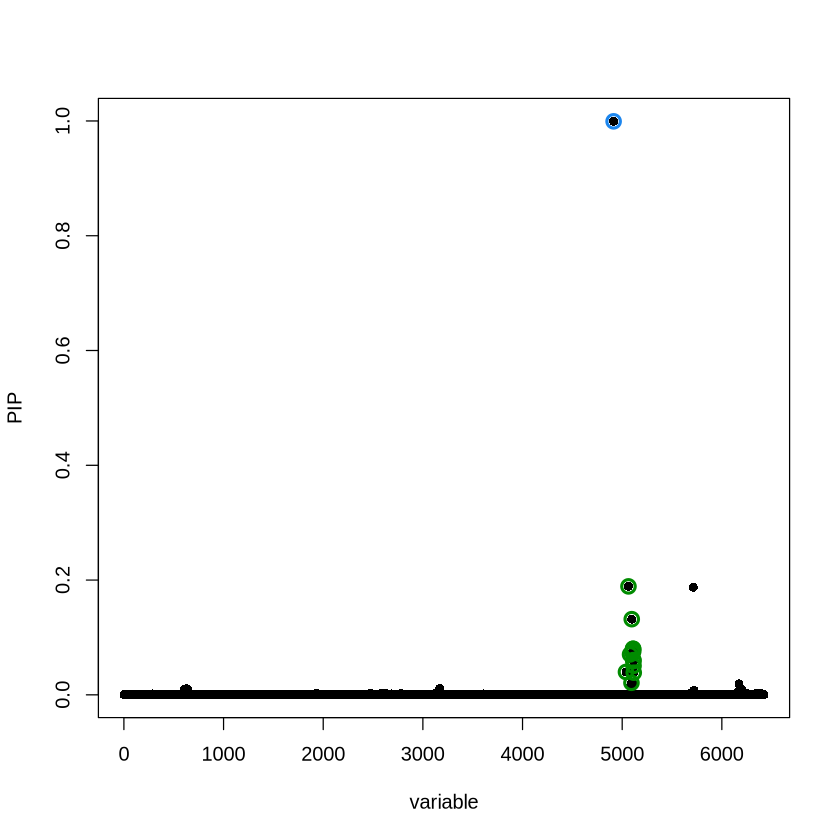

In [39]:
library(susieR)
res = two_cs[[1]][["image_Aging1"]]$susie_rss_RSS_QC_RAISS_imputed$susie_result_trimmed
susie_plot(res, "PIP")

## Shared loci across traits
Since most study blocks use the SER model for fine-mapping, I can identify overlapping variants to detect shared significant SNPs and shared study_blocks, although this might be conservative...
1. Variant level
2. Block level


### 1. Variant level

In [11]:
AD1_variant = AD1 |> pull(variant_ID)
AD2_variant = AD2 |> pull(variant_ID)
Aging1_variant = Aging1 |> pull(variant_ID)
Aging2_variant = Aging2 |> pull(variant_ID)
Aging3_variant = Aging3 |> pull(variant_ID)
Aging4_variant = Aging4 |> pull(variant_ID)
Aging5_variant = Aging5 |> pull(variant_ID)





Attaching package: ‘ggVennDiagram’


The following object is masked from ‘package:tidyr’:

    unite




AD1 and AD2 overlap statistics:
Number of variants unique to AD1: 173 
Number of variants unique to AD2: 180 
Number of variants shared between AD1 and AD2: 10 
Total variants in AD1: 183 
Total variants in AD2: 190 


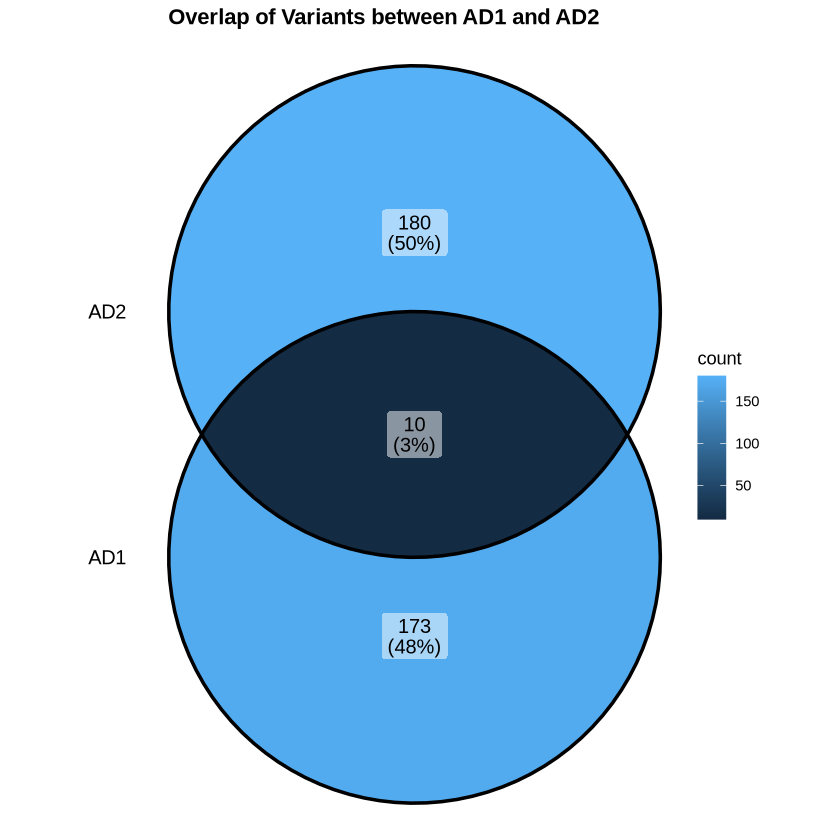

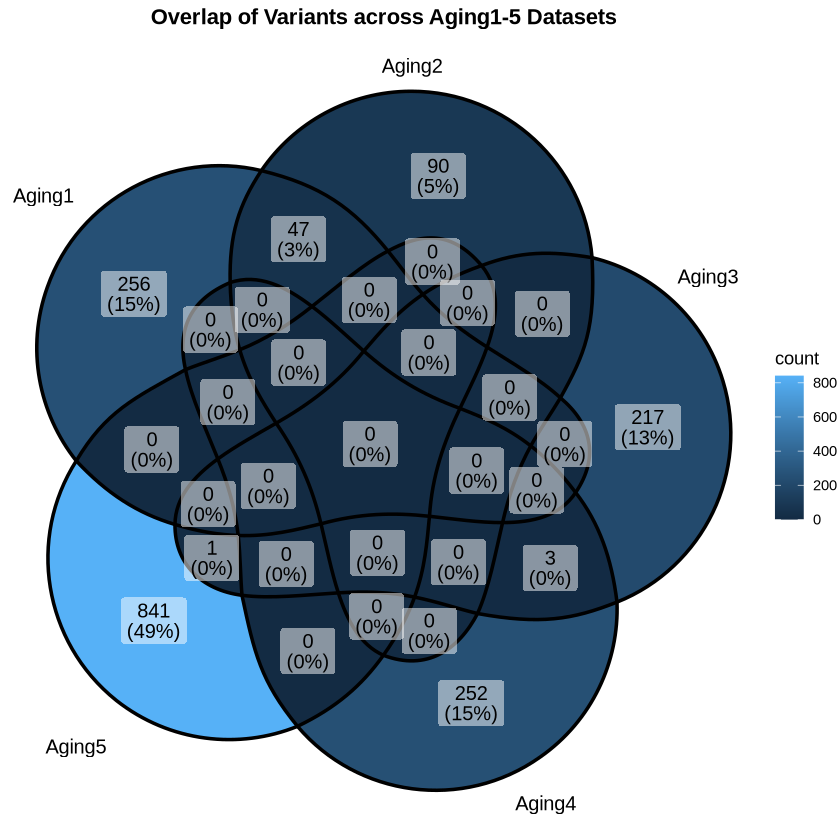

In [12]:
# Load required libraries
library(ggVennDiagram)  # For creating Venn diagrams
library(ggplot2)        # For additional plotting capabilities

# Assuming AD1_variant, AD2_variant, Aging1_variant, etc. are already defined vectors
# If these are not already defined, you would need to extract them from your data frames
# For example: AD1_variant <- AD1$variant_ID

# 1. Venn diagram for AD1 and AD2
ad_list <- list(AD1 = AD1_variant, 
                AD2 = AD2_variant)

ad_venn <- ggVennDiagram(ad_list) +
  ggtitle("Overlap of Variants between AD1 and AD2") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

print(ad_venn)

# Calculate and print the overlap statistics for AD1 and AD2
ad_overlap <- length(intersect(AD1_variant, AD2_variant))
ad1_unique <- length(setdiff(AD1_variant, AD2_variant))
ad2_unique <- length(setdiff(AD2_variant, AD1_variant))

cat("AD1 and AD2 overlap statistics:\n")
cat("Number of variants unique to AD1:", ad1_unique, "\n")
cat("Number of variants unique to AD2:", ad2_unique, "\n")
cat("Number of variants shared between AD1 and AD2:", ad_overlap, "\n")
cat("Total variants in AD1:", length(AD1_variant), "\n")
cat("Total variants in AD2:", length(AD2_variant), "\n")

# 2. Venn diagram for Aging1-5
aging_list <- list(Aging1 = Aging1_variant,
                  Aging2 = Aging2_variant,
                  Aging3 = Aging3_variant,
                  Aging4 = Aging4_variant,
                  Aging5 = Aging5_variant)

aging_venn <- ggVennDiagram(aging_list) +
  ggtitle("Overlap of Variants across Aging1-5 Datasets") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

print(aging_venn)



### 2.Block level 

In [13]:

# 3. Venn diagram for all datasets
all_list <- list(AD1 = unique(AD1$region_id),
                AD2 = unique(AD2$region_id),
                Aging1 = unique(Aging1$region_id),
                Aging2 = unique(Aging2$region_id),
                Aging3 = unique(Aging3$region_id),
                Aging4 = unique(Aging4$region_id),
                Aging5 = unique(Aging5$region_id))

# For all datasets, we might want to use a different approach
# as ggVennDiagram works best with 2-5 sets
# We can use the upset plot for visualizing many sets

# Install if not already installed
# install.packages("UpSetR")
library(UpSetR)

# Convert the list to a format suitable for UpSetR
# CORRECTED VERSION: Don't use unique() to avoid removing duplicates across datasets
all_variants <- unlist(all_list)
# Count occurrences of each variant
variant_counts <- table(all_variants)
# Keep only unique variant names but preserve their occurrence information
all_variants_unique <- names(variant_counts)

# Create presence matrix correctly
presence_matrix <- matrix(0, nrow = length(all_variants_unique), ncol = length(all_list))
colnames(presence_matrix) <- names(all_list)
rownames(presence_matrix) <- all_variants_unique

# Fill the matrix with correct presence information
for (i in 1:length(all_list)) {
  presence_matrix[all_variants_unique %in% all_list[[i]], i] <- 1
}

# Print matrix summary to check
cat("Matrix dimensions:", dim(presence_matrix), "\n")
cat("Number of variants present in each dataset:\n")
colSums(presence_matrix)

# Print overlap statistics
cat("\nNumber of variants present in multiple datasets:\n")
row_sums <- rowSums(presence_matrix)
table(row_sums)

# Convert to data frame for UpSetR
presence_df <- as.data.frame(presence_matrix)


head(presence_df)

Matrix dimensions: 67 7 
Number of variants present in each dataset:


AD1    AD2 Aging1 Aging2 Aging3 Aging4 Aging5 
     9     12     12     11      9     12     17


Number of variants present in multiple datasets:


row_sums
 1  2  3 
55  9  3 

,AD1,AD2,Aging1,Aging2,Aging3,Aging4,Aging5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_214114077_215979204,0,0,0,0,1,1,0
chr1_233234629_234364329,0,0,0,0,0,1,0
chr1_2888443_4320284,0,0,1,0,0,0,0
chr1_44020567_47757518,0,0,0,0,0,0,1
chr1_50179506_54277735,1,0,0,0,0,0,0
chr1_63330290_66474395,0,0,0,0,0,1,0


In [23]:
fwrite(presence_matrix, "presence_matrix.tsv", sep ='\t')

x being coerced from class: matrix to data.table



pdf 
  2

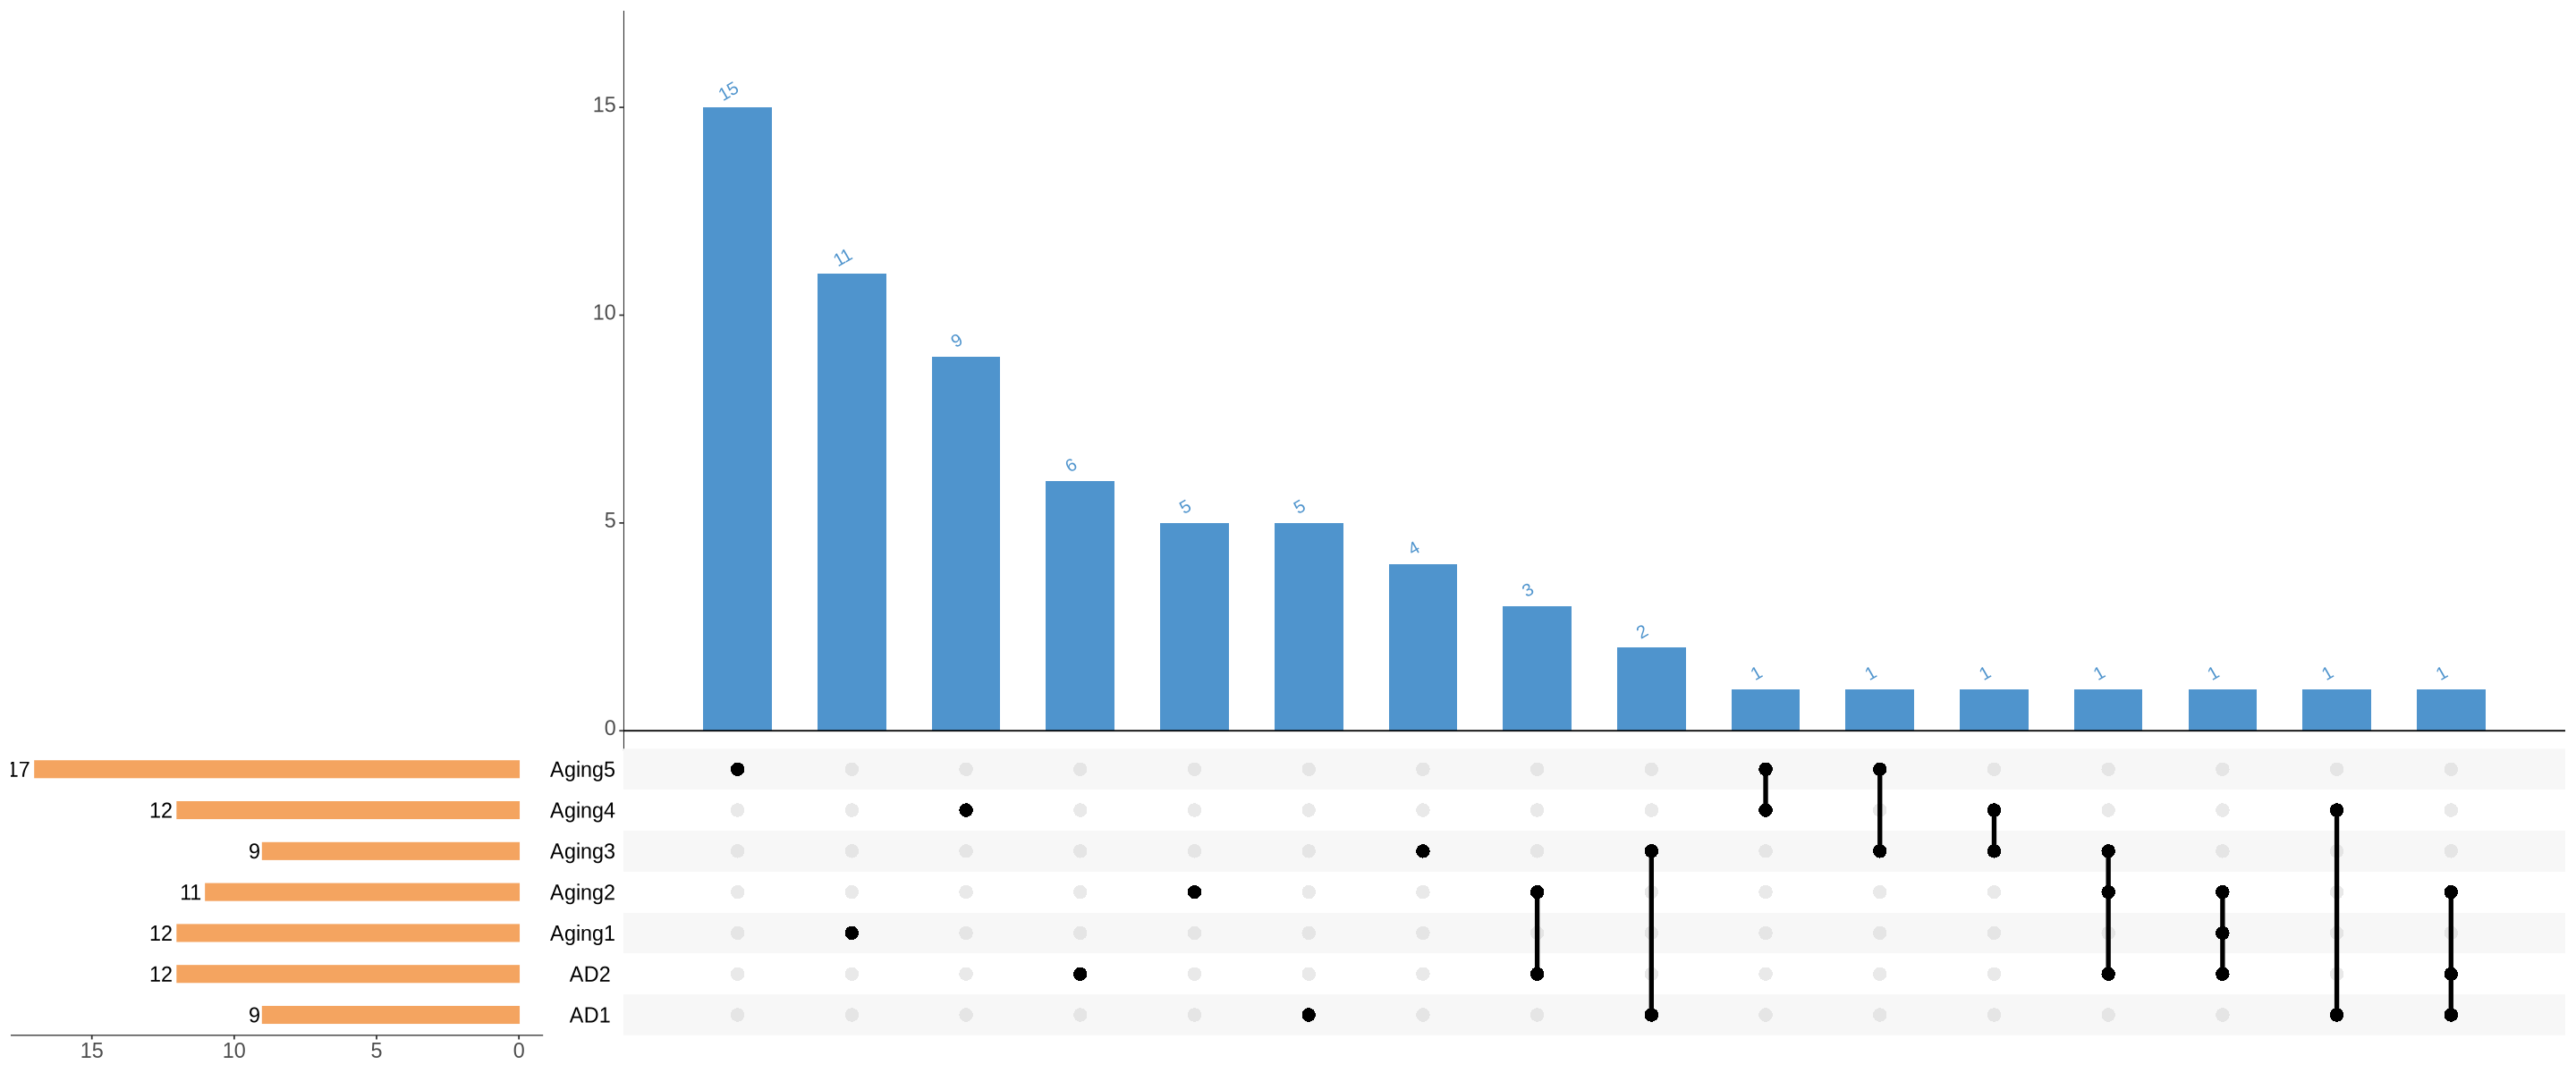

In [19]:
# Save the upset plot
# Choose one of the following formats:


options(repr.plot.width = 24, repr.plot.height = 10)


p = upset(presence_df, 
      sets = c("AD1", "AD2", "Aging1", "Aging2", "Aging3", "Aging4", "Aging5"),
      keep.order = T,
      nintersects = 100,
      order.by = "freq",
      main.bar.color = "steelblue3",
      matrix.color = "black",
      sets.bar.color = "sandybrown",
      set_size.show = TRUE,
      number.angles = 30,
      text.scale = c(2,2,2,2,2),
      point.size = 4,
      line.size = 1.5,
      mainbar.y.label = "",
      sets.x.label = NULL,
      mb.ratio = c(0.7, 0.3),  # Adjust ratio between main bar and matrix
      )
print(p)
# Save the plot to a file
png("upset_plot_ucos_block.png", width = 24, height = 10, units = "in", res = 300)
print(p)
dev.off()

In [21]:
presence_df_cos <- filter(presence_df, rowSums(presence_df) > 1)
dim(present_df_cos)

[1] 12  7

pdf 
  2

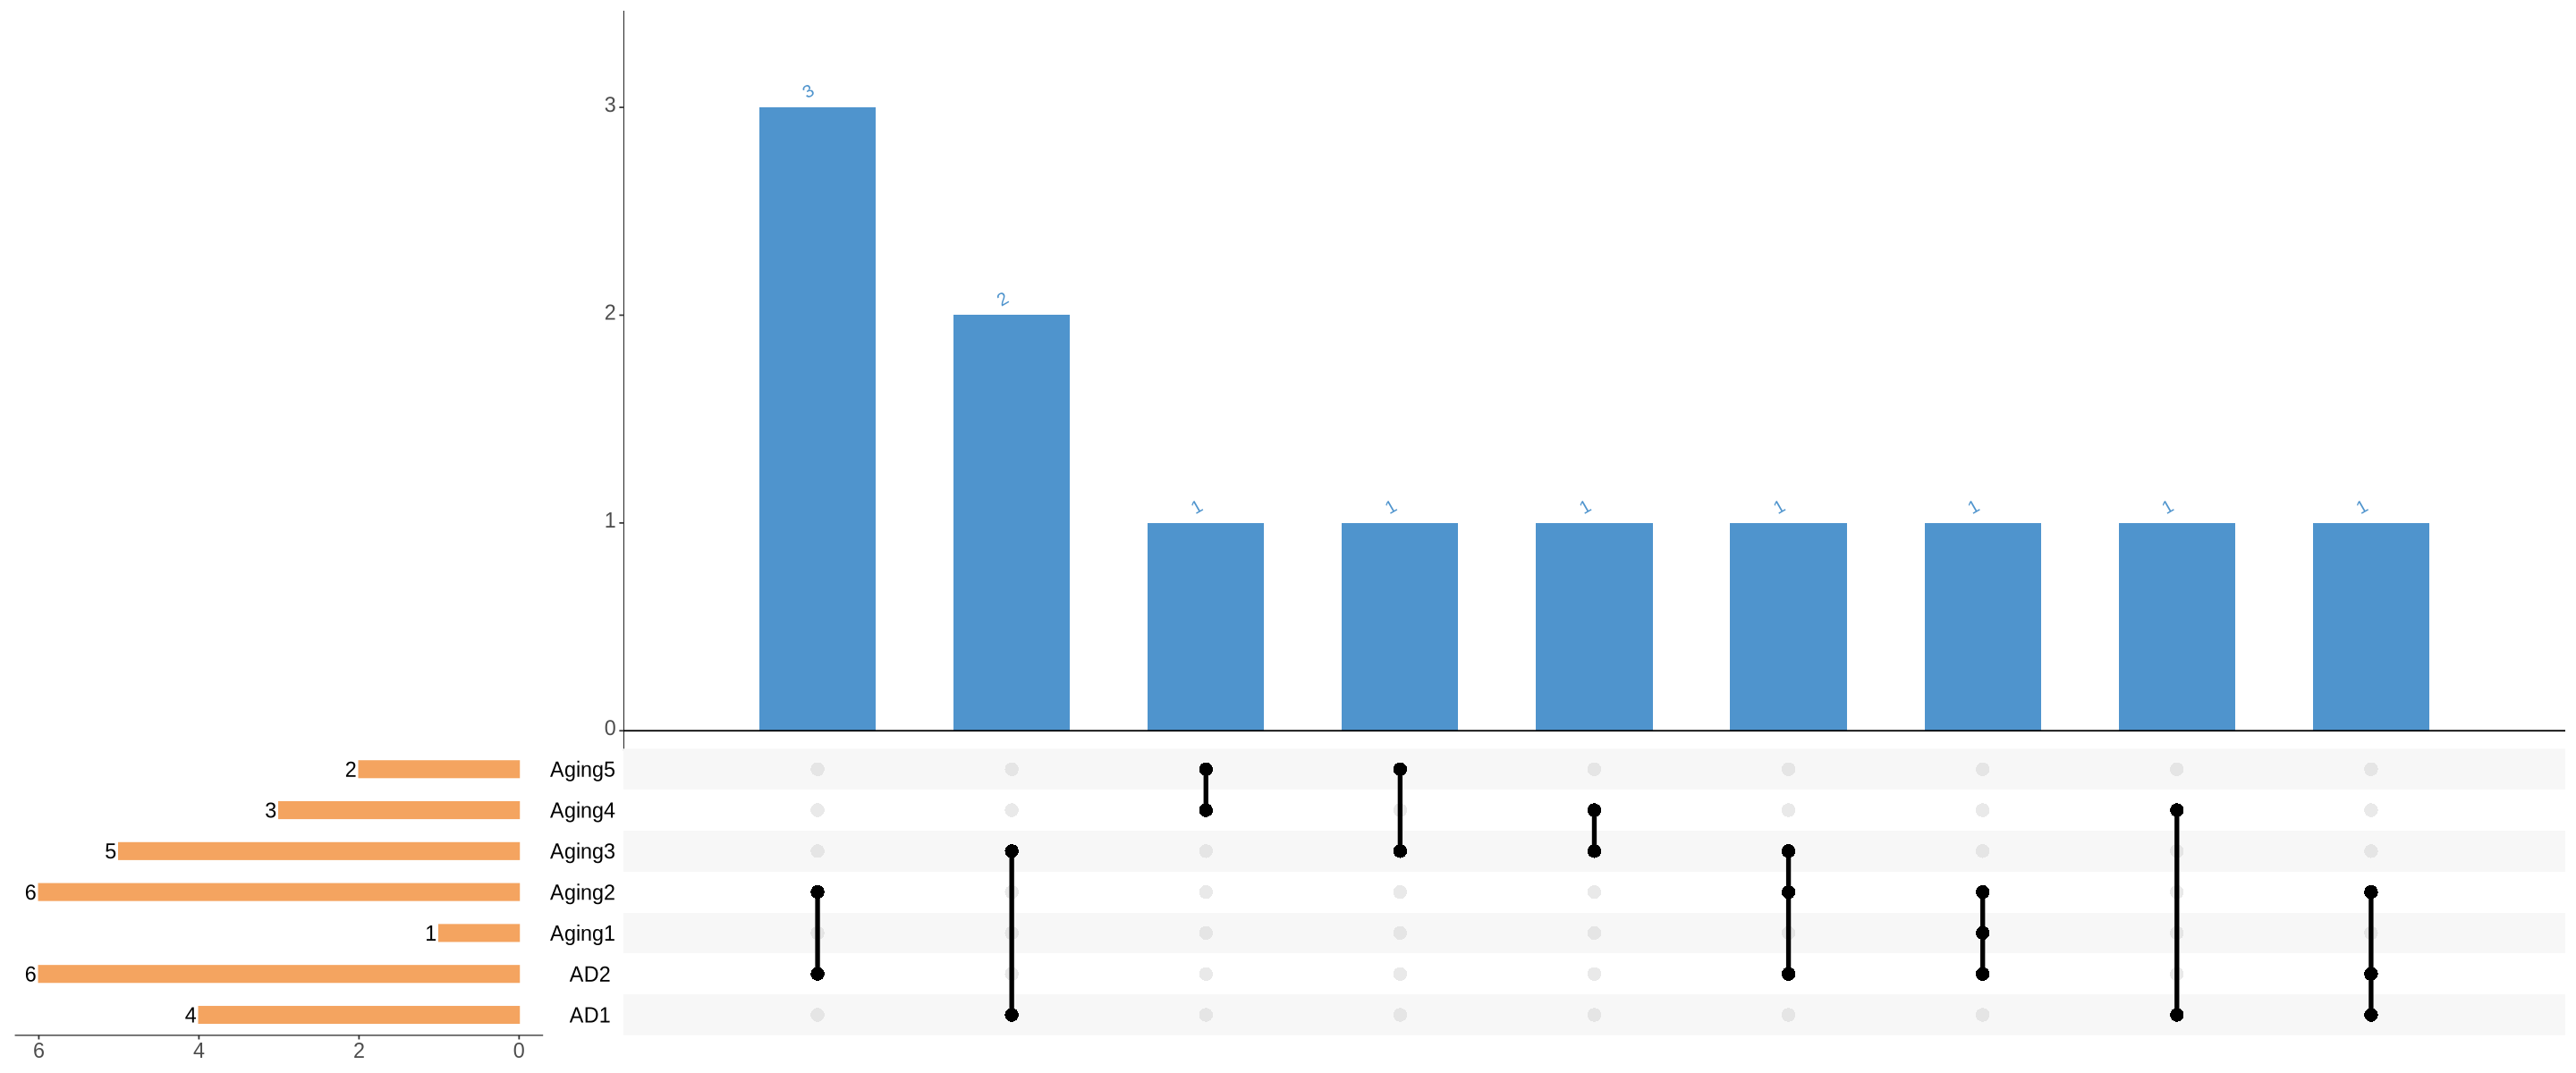

In [22]:
# Save the upset plot
# Choose one of the following formats:


options(repr.plot.width = 24, repr.plot.height = 10)


p = upset(presence_df_cos, 
      sets = c("AD1", "AD2", "Aging1", "Aging2", "Aging3", "Aging4", "Aging5"),
      keep.order = T,
      nintersects = 100,
      order.by = "freq",
      main.bar.color = "steelblue3",
      matrix.color = "black",
      sets.bar.color = "sandybrown",
      set_size.show = TRUE,
      number.angles = 30,
      text.scale = c(2,2,2,2,2),
      point.size = 4,
      line.size = 1.5,
      mainbar.y.label = "",
      sets.x.label = NULL,
      mb.ratio = c(0.7, 0.3),  # Adjust ratio between main bar and matrix
      )
print(p)
# Save the plot to a file
png("upset_plot_cos_block.png", width = 24, height = 10, units = "in", res = 300)
print(p)
dev.off()

In [ ]:
options(repr.plot.width = 24, repr.plot.height = 10)
max_size <- max(unique_cos_block)
p <- upset(fromList(coloc), 
            order.by = "freq", 
            keep.order = T,
            main.bar.color = "steelblue3", 
            sets.bar.color = "sandybrown", 
            text.scale = c(2,2,2,2,2), # Adjust font sizes for the main title, set names, set sizes, intersection sizes, and axis titles
            matrix.color = "black", # Adjust the color of matrix dots
            number.angles = 30, # Adjust the angle of number labels, useful for some plots
            mb.ratio = c(0.5, 0.5), # Adjust the ratio of main bar and sets bar
            point.size = 4, line.size = 1.5,
            sets = cohorts,  
            nsets = length(coloc),
            set_size.show = TRUE,
            set_size.angles = 0,
            set_size.numbers_size = 7,
            set_size.scale_max = max_size + 0.25*max_size,
            nintersects = 100,
            mainbar.y.label = "",
            sets.x.label = NULL)

# Display the plot in the notebook
print(p)

# Save the plot to a file
png("upset_plot_cos_block.png", width = 24, height = 10, units = "in", res = 300)
print(p)
dev.off()

In [74]:
AD_shared = inner_join(AD1, AD2, by = "variant_ID")

In [75]:
AD_shared |> count(region_id.x)

region_id.x,n
<chr>,<int>
chr9_116251953_117124386,10


chr9_116251953_117124386 is the only CS with shared top loci for both AD1 and AD2.

In [71]:
Aging12_shared = inner_join(Aging1, Aging2, by = "variant_ID")

In [73]:
Aging12_shared |> count(region_id.x)

region_id.x,n
<chr>,<int>
chr6_122787546_128506682,47


In [76]:
Aging34_shared = inner_join(Aging3, Aging4, by = "variant_ID")

In [77]:
Aging34_shared |> count(region_id.x)

region_id.x,n
<chr>,<int>
chr1_214114077_215979204,3


In [78]:
Aging35_shared = inner_join(Aging3, Aging5, by = "variant_ID")

In [79]:
Aging35_shared |> count(region_id.x)

region_id.x,n
<chr>,<int>
chr20_40697409_42726168,1


## Top loci that can be explained by GVC gene list

In [8]:
top_loci_0.95_image = top_loci_0.95 |> filter(str_detect(event_ID, "image"))

In [9]:
dim(top_loci_0.95_image)

[1] 2131   17

In [7]:
filtered_gene_list = fread("/home/rl3328/image_QTL/colocboost/image7+ad6/GVC_gene_list.gene_list.tsv")
head(filtered_gene_list)
dim(filtered_gene_list)

#chr,start,end,gene_id,strand,gene_name
<chr>,<int>,<int>,<chr>,<chr>,<chr>
chr1,207496146,207641764,ENSG00000203710,+,CR1
chr1,226870183,226927725,ENSG00000143801,+,PSEN2
chr1,226870183,226987544,ENSG00000288674,+,AL391628.1
chr2,127048026,127107287,ENSG00000136717,-,BIN1
chr5,140558267,140564780,ENSG00000113108,-,APBB3
chr6,41158505,41163185,ENSG00000095970,-,TREM2


[1] 21  6

In [9]:
top_variants = top_loci_0.95_image |> pull(variant_ID)
length(top_variants)
top_variants_unique = unique(top_variants)
length(unique(top_variants_unique))


[1] 2131

[1] 2042

In [10]:
# Parse variant to extract chr and position
parse_variant <- function(variant_str) {
  # Format: "chr1:11698737:A>T"
  parts <- strsplit(variant_str, ":")[[1]]
  chr <- parts[1]
  # Handle potential additional colons in the variant (e.g., in case of complex variants)
  position <- as.numeric(strsplit(parts[2], "[^0-9]")[[1]][1])
  return(list(chr = chr, position = position))
}

# Function to check if a variant position is within a gene's cis window
is_variant_in_cis_window <- function(gene_chr, gene_start, gene_end, variant_str, window_size = 500000) {
  variant <- parse_variant(variant_str)
  cis_start <- gene_start - window_size
  cis_end <- gene_end + window_size
  # Check if the variant is within the cis window boundaries
  return(gene_chr == paste0("chr", variant$chr) && 
         variant$position >= cis_start && 
         variant$position <= cis_end)
}

# Find matching variants within cis window for each gene
find_cis_window_variants <- function(gene_chr, gene_start, gene_end, variants_unique, window_size = 500000) {
  matching_variants <- character(0)
  cis_start <- gene_start - window_size
  cis_end <- gene_end + window_size
  
  for(variant in variants_unique) {
    if(is_variant_in_cis_window(gene_chr, gene_start, gene_end, variant, window_size)) {
      matching_variants <- c(matching_variants, variant)
    }
  }
  
  if(length(matching_variants) > 0) {
    return(list(
      is_in_cis_window = TRUE,
      cis_window_lower_bound = cis_start,
      cis_window_upper_bound = cis_end,
      contained_variants = paste(matching_variants, collapse = ";")
    ))
  } else {
    return(list(
      is_in_cis_window = FALSE,
      cis_window_lower_bound = cis_start,
      cis_window_upper_bound = cis_end,
      contained_variants = NA
    ))
  }
}

# Initialize the new columns
filtered_gene_list$is_in_cis_window <- FALSE
filtered_gene_list$cis_window_lower_bound <- NA
filtered_gene_list$cis_window_upper_bound <- NA
filtered_gene_list$contained_variants <- NA

# Define window size as a parameter for easier modification
window_size <- 500000

# Loop through each row to find cis window variants
for (i in 1:nrow(filtered_gene_list)) {
  result <- find_cis_window_variants(
    filtered_gene_list$`#chr`[i],
    filtered_gene_list$start[i],
    filtered_gene_list$end[i],
    top_variants_unique,
    window_size
  )
  filtered_gene_list$is_in_cis_window[i] <- result$is_in_cis_window
  filtered_gene_list$cis_window_lower_bound[i] <- result$cis_window_lower_bound
  filtered_gene_list$cis_window_upper_bound[i] <- result$cis_window_upper_bound
  filtered_gene_list$contained_variants[i] <- result$contained_variants
}

# View the result
print(filtered_gene_list)

      #chr     start       end         gene_id strand  gene_name
    <char>     <int>     <int>          <char> <char>     <char>
 1:   chr1 207496146 207641764 ENSG00000203710      +        CR1
 2:   chr1 226870183 226927725 ENSG00000143801      +      PSEN2
 3:   chr1 226870183 226987544 ENSG00000288674      + AL391628.1
 4:   chr2 127048026 127107287 ENSG00000136717      -       BIN1
 5:   chr5 140558267 140564780 ENSG00000113108      -      APBB3
 6:   chr6  41158505  41163185 ENSG00000095970      -      TREM2
 7:   chr7 100367529 100400095 ENSG00000085514      +      PILRA
 8:   chr7 143390288 143408855 ENSG00000146904      -      EPHA1
 9:  chr11  47354859  47378546 ENSG00000066336      -       SPI1
10:  chr11  60172013  60184665 ENSG00000110077      -     MS4A6A
11:  chr11  85957174  86069881 ENSG00000073921      -     PICALM
12:  chr11 121452313 121633762 ENSG00000137642      +      SORL1
13:  chr10 113679161 113730906 ENSG00000165806      +      CASP7
14:  chr14  73136417  732

In [11]:
variants = filtered_gene_list |> 
  filter(is_in_cis_window == TRUE) |> 
  pull(contained_variants) |> 
  str_split(";") |> 
  unlist() |> 
  unique()

In [12]:
top_loci_0.95_image |> filter(variant_ID %in% variants)

chr,pos,a1,a2,variant_ID,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,cs_coverage_0.95_purity0.5,cs_coverage_0.7_purity0.5,cs_coverage_0.5_purity0.5,PIP,region_id,finemap_model
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<dbl>,<chr>,<chr>
11,46936748,T,G,11:46936748:G:T,chr11_46916060_49936088,image_AD2,1,1,1,NA,NA,NA,0.10404344,chr11_46916060_49936088,single_effect_NO_QC
11,46955857,T,C,11:46955857:C:T,chr11_46916060_49936088,image_AD2,1,1,1,NA,NA,NA,0.09062421,chr11_46916060_49936088,single_effect_NO_QC
11,46960612,G,A,11:46960612:A:G,chr11_46916060_49936088,image_AD2,1,1,1,NA,NA,NA,0.08918159,chr11_46916060_49936088,single_effect_NO_QC
11,46961687,G,A,11:46961687:A:G,chr11_46916060_49936088,image_AD2,1,1,0,NA,NA,NA,0.08918159,chr11_46916060_49936088,single_effect_NO_QC
11,46991890,A,G,11:46991890:G:A,chr11_46916060_49936088,image_AD2,1,1,0,NA,NA,NA,0.08748880,chr11_46916060_49936088,single_effect_NO_QC
11,47015399,A,G,11:47015399:G:A,chr11_46916060_49936088,image_AD2,1,0,0,NA,NA,NA,0.08249851,chr11_46916060_49936088,single_effect_NO_QC
11,47078316,T,C,11:47078316:C:T,chr11_46916060_49936088,image_AD2,1,1,1,NA,NA,NA,0.12413455,chr11_46916060_49936088,single_effect_NO_QC
11,47098515,C,T,11:47098515:T:C,chr11_46916060_49936088,image_AD2,1,0,0,NA,NA,NA,0.08729426,chr11_46916060_49936088,single_effect_NO_QC
11,47146703,G,A,11:47146703:A:G,chr11_46916060_49936088,image_AD2,1,1,1,NA,NA,NA,0.12781061,chr11_46916060_49936088,single_effect_NO_QC


## Top loci that can be explained by Table1 gene list

In [4]:
top_loci_0.95_image = top_loci_0.95 |> filter(str_detect(event_ID, "image"))

In [5]:
dim(top_loci_0.95_image)

[1] 2131   16

In [14]:
filtered_gene_list = fread("/home/rl3328/image_QTL/colocboost/image7+ad6/Table1_gene_list.gene_list.tsv")
head(filtered_gene_list)
dim(filtered_gene_list)

#chr,start,end,gene_id,strand,gene_name
<chr>,<int>,<int>,<chr>,<chr>,<chr>
chr1,109309567,109397917,ENSG00000134243,-,SORT1
chr1,207496146,207641764,ENSG00000203710,+,CR1
chr2,9488485,9556731,ENSG00000151694,-,ADAM17
chr2,37250501,37324832,ENSG00000115825,-,PRKD3
chr2,105744911,105894273,ENSG00000071051,+,NCK2
chr2,127048026,127107287,ENSG00000136717,-,BIN1


[1] 76  6

In [15]:
top_variants = top_loci_0.95_image |> pull(variant_ID)
length(top_variants)
top_variants_unique = unique(top_variants)
length(unique(top_variants_unique))


[1] 2131

[1] 2042

In [16]:
# Parse variant to extract chr and position
parse_variant <- function(variant_str) {
  # Format: "chr1:11698737:A>T"
  parts <- strsplit(variant_str, ":")[[1]]
  chr <- parts[1]
  # Handle potential additional colons in the variant (e.g., in case of complex variants)
  position <- as.numeric(strsplit(parts[2], "[^0-9]")[[1]][1])
  return(list(chr = chr, position = position))
}

# Function to check if a variant position is within a gene's cis window
is_variant_in_cis_window <- function(gene_chr, gene_start, gene_end, variant_str, window_size = 500000) {
  variant <- parse_variant(variant_str)
  cis_start <- gene_start - window_size
  cis_end <- gene_end + window_size
  # Check if the variant is within the cis window boundaries
  return(gene_chr == paste0("chr", variant$chr) && 
         variant$position >= cis_start && 
         variant$position <= cis_end)
}

# Find matching variants within cis window for each gene
find_cis_window_variants <- function(gene_chr, gene_start, gene_end, variants_unique, window_size = 500000) {
  matching_variants <- character(0)
  cis_start <- gene_start - window_size
  cis_end <- gene_end + window_size
  
  for(variant in variants_unique) {
    if(is_variant_in_cis_window(gene_chr, gene_start, gene_end, variant, window_size)) {
      matching_variants <- c(matching_variants, variant)
    }
  }
  
  if(length(matching_variants) > 0) {
    return(list(
      is_in_cis_window = TRUE,
      cis_window_lower_bound = cis_start,
      cis_window_upper_bound = cis_end,
      contained_variants = paste(matching_variants, collapse = ";")
    ))
  } else {
    return(list(
      is_in_cis_window = FALSE,
      cis_window_lower_bound = cis_start,
      cis_window_upper_bound = cis_end,
      contained_variants = NA
    ))
  }
}

# Initialize the new columns
filtered_gene_list$is_in_cis_window <- FALSE
filtered_gene_list$cis_window_lower_bound <- NA
filtered_gene_list$cis_window_upper_bound <- NA
filtered_gene_list$contained_variants <- NA

# Define window size as a parameter for easier modification
window_size <- 500000

# Loop through each row to find cis window variants
for (i in 1:nrow(filtered_gene_list)) {
  result <- find_cis_window_variants(
    filtered_gene_list$`#chr`[i],
    filtered_gene_list$start[i],
    filtered_gene_list$end[i],
    top_variants_unique,
    window_size
  )
  filtered_gene_list$is_in_cis_window[i] <- result$is_in_cis_window
  filtered_gene_list$cis_window_lower_bound[i] <- result$cis_window_lower_bound
  filtered_gene_list$cis_window_upper_bound[i] <- result$cis_window_upper_bound
  filtered_gene_list$contained_variants[i] <- result$contained_variants
}

# View the result
print(filtered_gene_list)

      #chr     start       end         gene_id strand gene_name
    <char>     <int>     <int>          <char> <char>    <char>
 1:   chr1 109309567 109397917 ENSG00000134243      -     SORT1
 2:   chr1 207496146 207641764 ENSG00000203710      +       CR1
 3:   chr2   9488485   9556731 ENSG00000151694      -    ADAM17
 4:   chr2  37250501  37324832 ENSG00000115825      -     PRKD3
 5:   chr2 105744911 105894273 ENSG00000071051      +      NCK2
 6:   chr2 127048026 127107287 ENSG00000136717      -      BIN1
 7:   chr2 202874260 203014797 ENSG00000138442      -     WDR12
 8:   chr2 233059966 233207902 ENSG00000168918      +    INPP5D
 9:   chr3 155024123 155183703 ENSG00000196549      +       MME
10:   chr4    986996   1004563 ENSG00000127415      +      IDUA
11:   chr4  10486394  10684767 ENSG00000109684      -      CLNK
12:   chr4  40191052  40246966 ENSG00000168421      +      RHOH
13:   chr5  14704799  14871777 ENSG00000154122      -      ANKH
14:   chr5  86617927  86620961 ENSG00000

In [17]:
variants = filtered_gene_list |> 
  filter(is_in_cis_window == TRUE) |> 
  pull(contained_variants) |> 
  str_split(";") |> 
  unlist() |> 
  unique()

In [18]:
variants

[1] "2:202799252:C:T"         "2:202800206:C:G"        
  [3] "2:202802803:G:T"         "2:202807683:C:T"        
  [5] "2:202808349:A:C"         "2:202808840:A:T"        
  [7] "2:202809565:G:A"         "2:202811382:C:T"        
  [9] "2:202813935:A:T"         "2:202814460:C:T"        
 [11] "2:202814583:T:C"         "2:202816231:T:C"        
 [13] "2:202817581:C:G"         "2:202819267:A:G"        
 [15] "2:202820396:A:G"         "2:202821005:C:T"        
 [17] "2:202823577:A:T"         "2:202825191:A:G"        
 [19] "2:202825324:T:G"         "2:202828037:A:G"        
 [21] "2:202829191:A:C"         "2:202831103:G:C"        
 [23] "2:202832369:C:A"         "2:202833084:GA:G"       
 [25] "2:202833577:C:T"         "2:202833747:A:G"        
 [27] "2:202834014:T:C"         "2:202834656:C:T"        
 [29] "2:202836147:C:T"         "2:202836281:T:G"        
 [31] "2:202841710:C:T"         "2:202843029:A:G"        
 [33] "2:202843155:G:A"         "2:202845053:C:G"        
 [35] "2:202845274:G:C"         "2:202846858:T:A"        
 [37] "2:202848557:C:A"         "2:202850696:C:T"        
 [39] "2:202850791:C:T"         "2:202853959:T:C"        
 [41] "2:202854146:A:G"         "2:202854305:G:A"        
 [43] "2:202856051:T:C"         "2:202856591:C:T"        
 [45] "2:202857010:A:T"         "2:202860954:A:G"        
 [47] "2:202860955:A:C"         "2:202861260:T:C"        
 [49] "2:202861778:G:C"         "2:202863724:G:A"        
 [51] "2:202864454:C:G"         "2:202865040:G:A"        
 [53] "2:202869266:G:A"         "2:202871528:C:G"        
 [55] "2:202873047:A:G"         "2:202873941:G:A"        
 [57] "2:202875133:C:G"         "2:202875247:T:G"        
 [59] "2:202875287:C:T"         "2:202875547:A:C"        
 [61] "2:202877269:G:GGAAAA"    "2:202879722:G:A"        
 [63] "2:202879731:C:T"         "2:202879887:G:A"        
 [65] "2:202881162:T:C"         "2:202882093:A:G"        
 [67] "2:202882799:A:G"         "2:202884053:T:C"        
 [69] "2:202884716:T:C"         "2:202885549:C:T"        
 [71] "2:202887209:C:G"         "2:202887258:A:G"        
 [73] "2:202887295:G:A"         "2:202888293:G:A"        
 [75] "2:202888349:T:C"         "2:202891954:G:A"        
 [77] "2:202893193:A:G"         "2:202893673:T:C"        
 [79] "2:202893798:C:A"         "2:202893828:C:T"        
 [81] "2:202896433:TA:T"        "2:202896954:G:A"        
 [83] "2:202898353:T:G"         "2:202900086:T:A"        
 [85] "2:202901033:T:C"         "2:202901840:T:C"        
 [87] "2:202904063:G:A"         "2:202904389:C:T"        
 [89] "2:202905080:C:T"         "2:202906537:G:A"        
 [91] "2:202906929:C:G"         "2:202908514:G:A"        
 [93] "2:202908963:A:G"         "2:202910989:G:A"        
 [95] "2:202913180:G:A"         "2:202913477:A:T"        
 [97] "2:202915792:A:G"         "2:202917018:G:A"        
 [99] "2:202918286:C:T"         "2:202918761:G:A"        
[101] "2:202922089:A:G"         "2:202922397:A:G"        
[103] "2:202922682:A:G"         "2:202924227:T:C"        
[105] "2:202924956:C:T"         "2:202926166:T:C"        
[107] "2:202926610:G:A"         "2:202927189:G:A"        
[109] "2:202927905:A:G"         "2:202929539:T:C"        
[111] "2:202929716:G:A"         "2:202932091:C:G"        
[113] "2:202933595:C:T"         "2:202933642:TC:T"       
[115] "2:202936503:T:G"         "2:202940829:G:A"        
[117] "2:202941714:GTTAATTTT:G" "2:202942360:A:T"        
[119] "2:202944112:G:A"         "2:202946905:G:A"        
[121] "2:202947189:A:C"         "2:202949971:A:T"        
[123] "2:202951017:T:A"         "2:202951771:G:A"        
[125] "2:202954748:A:G"         "2:202957070:T:C"        
[127] "2:202958168:C:G"         "2:202958677:C:T"        
[129] "2:202960383:A:G"         "2:202961673:G:A"        
[131] "2:202962709:A:G"         "2:202962757:T:C"        
[133] "2:202962952:C:G"         "2:202962967:T:TA"       
[135] "2:202963469:G:A"         "2:202964074:T:TATAA"    
[137] "2:202964502:A:C"         "2:202964561:A:G"        


In [22]:
top_loci_0.95_image |> filter(variant_ID %in% variants & str_detect(event_ID, "AD"))

chr,pos,a1,a2,variant_ID,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,cs_coverage_0.95_purity0.5,cs_coverage_0.7_purity0.5,cs_coverage_0.5_purity0.5,PIP,region_id,finemap_model
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<dbl>,<chr>,<chr>
11,46936748,T,G,11:46936748:G:T,chr11_46916060_49936088,image_AD2,1,1,1,NA,NA,NA,0.10404344,chr11_46916060_49936088,single_effect_NO_QC
11,46955857,T,C,11:46955857:C:T,chr11_46916060_49936088,image_AD2,1,1,1,NA,NA,NA,0.09062421,chr11_46916060_49936088,single_effect_NO_QC
11,46960612,G,A,11:46960612:A:G,chr11_46916060_49936088,image_AD2,1,1,1,NA,NA,NA,0.08918159,chr11_46916060_49936088,single_effect_NO_QC
11,46961687,G,A,11:46961687:A:G,chr11_46916060_49936088,image_AD2,1,1,0,NA,NA,NA,0.08918159,chr11_46916060_49936088,single_effect_NO_QC
11,46991890,A,G,11:46991890:G:A,chr11_46916060_49936088,image_AD2,1,1,0,NA,NA,NA,0.08748880,chr11_46916060_49936088,single_effect_NO_QC
11,47015399,A,G,11:47015399:G:A,chr11_46916060_49936088,image_AD2,1,0,0,NA,NA,NA,0.08249851,chr11_46916060_49936088,single_effect_NO_QC
11,47078316,T,C,11:47078316:C:T,chr11_46916060_49936088,image_AD2,1,1,1,NA,NA,NA,0.12413455,chr11_46916060_49936088,single_effect_NO_QC
11,47098515,C,T,11:47098515:T:C,chr11_46916060_49936088,image_AD2,1,0,0,NA,NA,NA,0.08729426,chr11_46916060_49936088,single_effect_NO_QC
11,47146703,G,A,11:47146703:A:G,chr11_46916060_49936088,image_AD2,1,1,1,NA,NA,NA,0.12781061,chr11_46916060_49936088,single_effect_NO_QC


In [26]:
identified_variants = top_loci_0.95_image |> filter(variant_ID %in% variants)
identified_variants |> group_by(event_ID, region_id) |> summarise(n = n()) |> arrange(desc(n))
table(identified_variants$event_ID)

`summarise()` has grouped output by 'event_ID'. You can override using the
`.groups` argument.


event_ID,region_id,n
<chr>,<chr>,<int>
image_Aging5,chr2_201677542_203951659,212
image_Aging5,chr16_86782214_88382277,33
image_AD2,chr11_46916060_49936088,10
image_Aging2,chr7_6928965_7769511,10
image_Aging2,chr5_149895776_152257891,1



   image_AD2 image_Aging2 image_Aging5 
          10           11          245 